In [2]:
import pandas as pd
# Read in the csv file
votes = pd.read_csv("114_congress.csv")

# As you can see, there are 100 senators, and they voted on 15 bills (we subtract 3 because the first 3 columns aren't bills).
print(votes.shape)

# We have more "Yes" votes than "No" votes overall
print(pd.value_counts(votes.iloc[:,3:].values.ravel()))

(100, 18)
1.0    803
0.0    669
0.5     28
dtype: int64


In [3]:
import pandas as pd

# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans

# Create a kmeans model on our data, using 2 clusters. random_state helps ensure that the algorithm returns the same results each time.
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(votes.iloc[:, 3:])

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = kmeans_model.labels_

# The clustering looks pretty good!
# It's separated everyone into parties just based on voting history
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


In [4]:
# Let's call these types of voters "oddballs" (why not?)
# There aren't any republican oddballs
democratic_oddballs = votes[(labels == 1) & (votes["party"] == "D")]

# It looks like Reid has abstained a lot, which changed his cluster.
# Manchin seems like a genuine oddball voter.
print(democratic_oddballs["name"])

42    Heitkamp
56     Manchin
74        Reid
Name: name, dtype: object


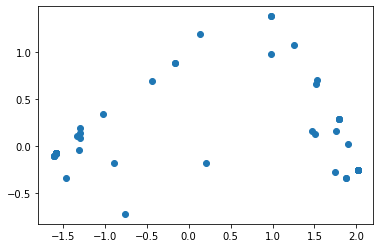

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca_2 = PCA(2)

# Turn the vote data into two columns with PCA
plot_columns = pca_2.fit_transform(votes.iloc[:,3:18])

# Plot senators based on the two dimensions, and shade by cluster label
# You can see the plot by clicking "plots" to the bottom right
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1])#, #c=votes["labels"])
plt.show()

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=5, random_state=1).fit(votes.iloc[:, 3:])
labels = kmeans_model.labels_

# The republicans are still pretty solid, but it looks like there are two democratic "factions"
print(pd.crosstab(labels, votes["party"]))

party   D  I   R
row_0           
0       6  0   0
1       0  0  52
2      31  1   0
3       0  0   2
4       7  1   0
